In [1]:
import pandas as pd 

## Importing dataset 

In [2]:
data=pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory data analysis

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

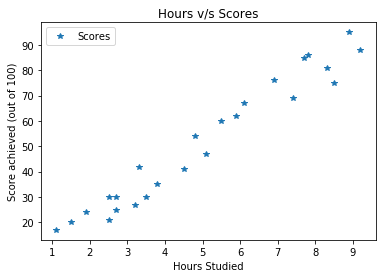

In [4]:
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours v/s Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score achieved (out of 100)')
plt.show()

#### From the graph, we can see that there is positive linear relation between the Hours studied and the score achieved. Hence , we will apply linear regression to train the model and make further predictions

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### This shows that there is no null values and also shows  the actual data type the dependent and independent variables have.




### Size of the data

In [6]:
data.shape

(25, 2)

## Seperating Independent and dependent variables

In [7]:
x=data['Hours'].to_frame()  #Independent variable 
y=data['Scores'] #Dependent variable


## Splitting the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)




### size of x_train,y_train,x_test,y_test

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)






## Training the model using Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Training set results

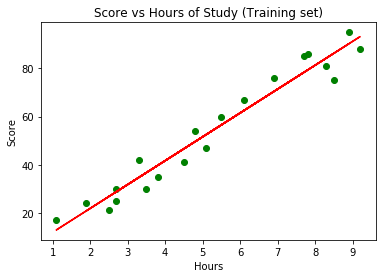

In [11]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Score vs Hours of Study (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Checking the intercept and the slope of the line generated

In [12]:
print(model.coef_)
print(model.intercept_)

[9.91065648]
2.018160041434683


### By using the straight line equation y = mx + c
### the line becomes

In [13]:
line=model.coef_*x + model.intercept_

## Plotting the line on the graph to see the best fit line 

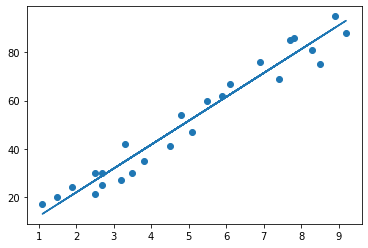

In [14]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Make predictions for test set to compare the predicted values with the actual values

In [15]:
y_pred=model.predict(x_test)

In [16]:
compare=pd.DataFrame({ 'Actual value': y_test,
                       'Predicted value':y_pred})
compare

,Actual value,Predicted value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Visualising the Test set results

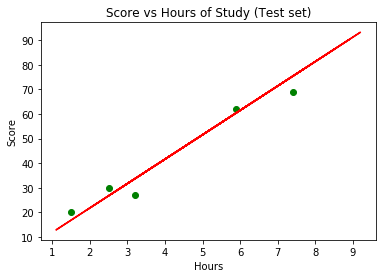

In [17]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Score vs Hours of Study (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Score prediction for studying 9.25 Hours

In [18]:
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Calculating the error 

In [20]:
from sklearn.metrics import mean_absolute_error,r2_score  
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print(' r2 Score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
 r2 Score:  0.9454906892105356
